In [1]:
#l'import des bib utiles
import feedparser
import pandas as pd
import numpy as np

#si besoin, il faut installer huggingface_hub, tranformers et torch
#!pip install huggingface_hub
#!pip install transformers
#!pip install torch

In [2]:
rss_url = "https://www.ouest-france.fr/rss/france"

feed_of_fr_monde = feedparser.parse(rss_url)
feed_of_fr_monde.entries[:5]

[{'title': 'L’Église catholique enregistre un bond des baptêmes d’adultes et d’adolescents en France',
  'title_detail': {'type': 'text/plain',
   'language': None,
   'base': 'https://www.ouest-france.fr/rss/france',
   'value': 'L’Église catholique enregistre un bond des baptêmes d’adultes et d’adolescents en France'},
  'links': [{'rel': 'alternate',
    'type': 'text/html',
    'href': 'https://www.ouest-france.fr/societe/religions/leglise-catholique-enregistre-un-bond-des-baptemes-dadultes-et-dadolescents-8ef12922-1604-11f0-a9e1-03ede7a28dd6?utm_source=fluxpublicfrance&utm_medium=fluxrss&utm_campaign=banquedecontenu'},
   {'length': '37785',
    'type': 'image/jpeg',
    'href': 'https://media.ouest-france.fr/v1/pictures/MjAyNTA0NzQzY2E0OGE3ZjUyNTIyMmU2MTY3NWUwYjg2YWU2MjA?width=320&height=240&focuspoint=50%2C25&cropresize=1&client_id=bpeditorial&sign=65fe64e4e2fac0e8df909d9a4e122f5cc944f27296b4fe291a00dda42e553884',
    'rel': 'enclosure'}],
  'link': 'https://www.ouest-france.fr/

In [3]:
articles_monde= []

for entry in feed_of_fr_monde.entries:
    articles_monde.append({
        "titre": entry.title,
        "lien": entry.link,
        "date de publication": entry.published
    })

df_articles_monde = pd.DataFrame(articles_monde)
df_articles_monde.head()

,titre,lien,date de publication
0,L’Église catholique enregistre un bond des bap...,https://www.ouest-france.fr/societe/religions/...,"Thu, 10 Apr 2025 12:47:50 GMT"
1,Désinformation climatique : une étude inédite ...,https://www.ouest-france.fr/medias/desinformat...,"Thu, 10 Apr 2025 12:12:54 GMT"
2,#MeToo : le festival de Cannes se dit « attent...,https://www.ouest-france.fr/cinema/festival/fe...,"Thu, 10 Apr 2025 10:21:39 GMT"
3,Philippe Poutou devient patron : l’ancien cand...,https://www.ouest-france.fr/politique/philippe...,"Thu, 10 Apr 2025 10:17:48 GMT"
4,Un État palestinien reconnu par la France en j...,https://www.ouest-france.fr/monde/palestine/un...,"Thu, 10 Apr 2025 10:02:33 GMT"


In [15]:
from transformers import pipeline
import os
hf_token = os.getenv("HF_TOKEN")

classifier = pipeline("sentiment-analysis",
                      model="ac0hik/Sentiment_Analysis_French", 
                      token=hf_token)  # Utilisation du paramètre token au lieu de use_auth_token
exemple_titre = df_articles_monde['titre'][0]
print(classifier(exemple_titre))

Device set to use cpu


[{'label': 'positive', 'score': 0.8032646775245667}]


In [17]:
sentiment = []
score = []
for index, row in df_articles_monde.iterrows():
    titre = row['titre']
    resultat = classifier(titre)[0]
    sentiment.append(resultat['label'])
    score.append(resultat['score'])

df_articles_monde['sentiment']=sentiment
df_articles_monde['score']=score

df_articles_monde.head()

,titre,lien,date de publication,sentiment,score
0,L’Église catholique enregistre un bond des bap...,https://www.ouest-france.fr/societe/religions/...,"Thu, 10 Apr 2025 12:47:50 GMT",positive,0.803265
1,Désinformation climatique : une étude inédite ...,https://www.ouest-france.fr/medias/desinformat...,"Thu, 10 Apr 2025 12:12:54 GMT",negative,0.929746
2,#MeToo : le festival de Cannes se dit « attent...,https://www.ouest-france.fr/cinema/festival/fe...,"Thu, 10 Apr 2025 10:21:39 GMT",positive,0.856848
3,Philippe Poutou devient patron : l’ancien cand...,https://www.ouest-france.fr/politique/philippe...,"Thu, 10 Apr 2025 10:17:48 GMT",positive,0.708937
4,Un État palestinien reconnu par la France en j...,https://www.ouest-france.fr/monde/palestine/un...,"Thu, 10 Apr 2025 10:02:33 GMT",positive,0.758311


C:\Users\Thibaut\AppData\Local\Temp\ipykernel_2832\2105122308.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


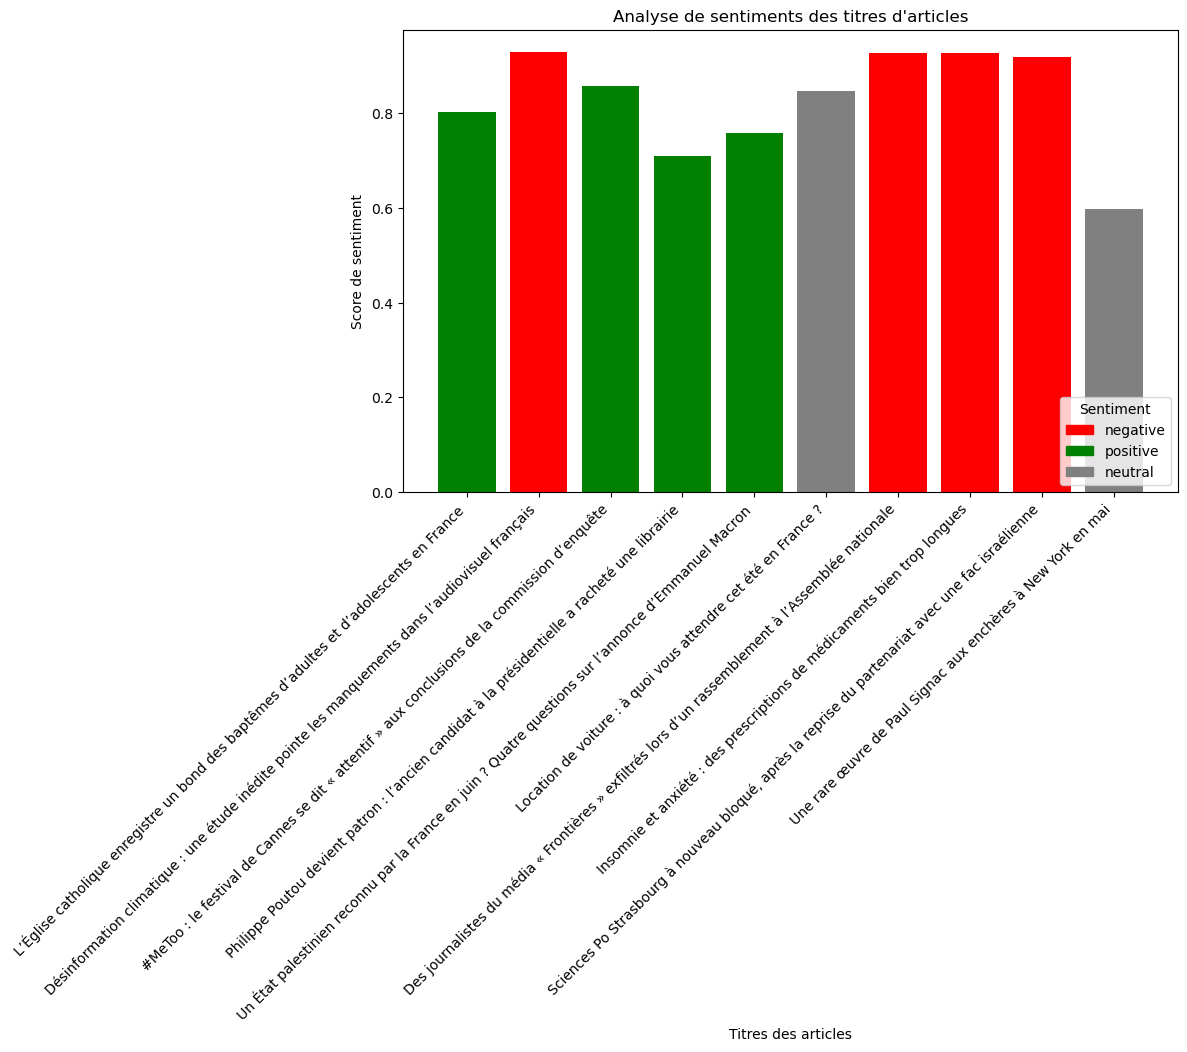

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
colors = {'negative': 'red', 'positive': 'green', 'neutral': 'gray'}


plt.bar(df_articles_monde['titre'], df_articles_monde['score'], color=df_articles_monde['sentiment'].map(colors))


plt.title('Analyse de sentiments des titres d\'articles')
plt.xlabel('Titres des articles')
plt.ylabel('Score de sentiment')


import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
plt.legend(handles=legend_handles, loc='lower right', title='Sentiment')


plt.xticks(rotation=45, ha="right") 
plt.tight_layout()
plt.show()

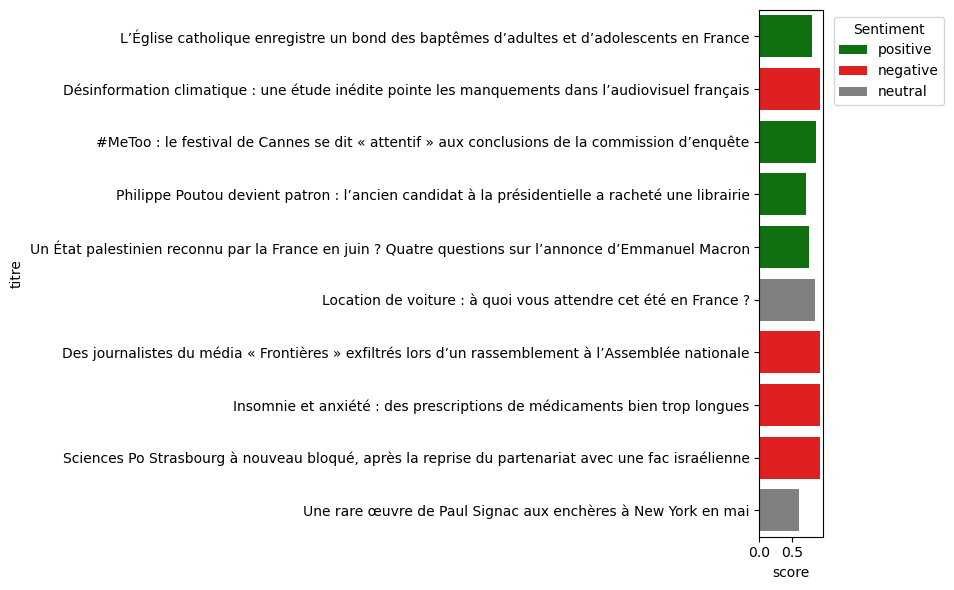

In [21]:
import seaborn as sns

plt.figure(figsize=(10, 6))

palette = {'positive': 'green', 'negative': 'red', 'neutral' : 'gray'}

sns.barplot(x='score', y='titre', hue='sentiment', data=df_articles_monde, palette=palette)

plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()